In [4]:
import chess
import chess.pgn
import chess.svg
import matplotlib.pyplot as plt
from lru import LRU
from IPython.display import SVG, display
import numpy as np

%matplotlib inline

#### Chess board svg example

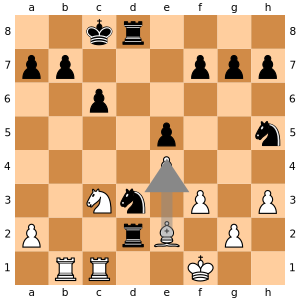

In [6]:
def show_svg(board, arrows = []):
    res = []
    
    for m in arrows:
        res.append((m.from_square, m.to_square))
        
    brd = chess.svg.board(board, arrows=res, size=300)
    display(SVG(brd))

pgn = open("data/ficsgamesdb_2016_standard2000_nomovetimes_1466264.pgn")

node = chess.pgn.read_game(pgn)
moves = node.main_line()

while not node.is_end():
    next_node = node.variation(0)
    node = next_node

m = chess.Move.from_uci("e2e4")
show_svg(node.board(), arrows = [m])

#### UCI engine evaluation example

In [110]:
# import chess.uci
# engine = chess.uci.popen_engine("./stockfish")
# engine.uci()
# engine.position(node.board())

# info_handler = chess.uci.InfoHandler()
# engine.info_handlers.append(info_handler)

# engine.go(movetime = 0)

BestMove(bestmove=Move.from_uci('h5g3'), ponder=Move.from_uci('f1g1'))

In [111]:
info_handler.info["score"][1].cp

809

### DFS

In [38]:
# bitifyFEN(beautifyFEN(chess.Board().fen()))
# bitarray.test()

..................................................

bitarray is installed in: /home/user/anaconda2/lib/python2.7/site-packages/bitarray
bitarray version: 0.8.1
2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


....................................................................................
----------------------------------------------------------------------
Ran 134 tests in 1.293s

OK


<unittest.runner.TextTestResult run=134 errors=0 failures=0>

#### FEN $\rightarrow$ bitarray converter

In [112]:
# Converter from FEN to bitarray structure
from bitarray import bitarray

class FENConverter:
    def __init__(self):
        self.space = 12
        self.pieces = { 'p': 0, 'P': 6, 'n': 1, 'N': 7, 'b': 2, 
                       'B': 8, 'r': 3, 'R': 9, 'q': 4, 'Q': 10, 
                       'k': 5, 'K': 11 }

    def beautifyFEN(self, f0):
        f = f0
        newf = []

        for char in f:
            if char.isdigit():
                for i in range(int(char)):
                    newf.append(self.space)
            elif char != '/':
                newf.append(self.pieces[char])

        return newf
    
    def fen2bitarray(self, fen):
        fen = fen.split()
        bfen = self.beautifyFEN(fen[0])

        result = bitarray(8 * 8 * 12) 
        result.setall(False)

        # pieces
        for i in range(64):
            c = bfen[i]
            if c != self.space:
                result[c*64 + i] = 1
        
        # player to move
        if fen[1] == 'w':
            result.append(1) # white move
        else:
            result.append(0) # black move

        # castling rights 
        for i in ['k', 'K', 'Q', 'q']:
            result.append(i in fen[2])
        
        # Cell passed by pond in one move
        # 8 - because we can infer row from the 'player to move'
        result.extend("00000000")
        if fen[3] != '-':
            pos = 8 - (ord(fen[3][0]) - ord('a'))
            result[-pos] = 1
        
        return result

In [75]:
#print converter.beautifyFEN(chess.Board().fen())
# chess.Board().fen().split()
# result = bitarray()
# result.extend("101010")
# result
# ord('b') - ord('a')
# t = bitarray(600)
# print t[0]
# t[0] = 1 - t[0]
# print t[0]
# res = converter.fen2bitarray(chess.Board().fen())
# res.tobytes()
# result = bitarray("00000000")
# result[-1] = 1
# result

#### Early and late stages of the game

In [205]:
import chess.polyglot
import chess.syzygy
from chess.syzygy import MissingTableError

class EarlyGame:
    def __init__(self):
        self.book = chess.polyglot.open_reader("data/openings/komodo.bin")
        
    def getMove(self, board):
        res = None
        
        try:
            main_entry = self.book.find(board)
            res = main_entry.move()
        finally:
            return res
    
class EndGame:
    def __init__(self):
        self.tablebases = chess.syzygy.open_tablebases("data/endgame/")
        
    def getMove(self, board):
        move = None
        
        try:
            res = self.tablebases.probe_dtz(board)

            for m in board.legal_moves:
                board.push(m)
                cnd = -self.tablebases.probe_dtz(board)

                if (cnd > res):
                    move = m
                    res = cnd
                
                board.pop()
        finally:
            return move
        

In [206]:
# board = chess.Board()
# for m in board.legal_moves:
#     board.push(m)
#     print board
#     board.pop()

#### Endgame example

In [1]:
%load_ext autoreload
%autoreload 1
%aimport nnchess

In [8]:
def _trivial(t, s):
    return len(t) - len(t.translate(None, s))

endGame = nnchess.EndGame("data/endgame/")

def evaluate(pos):
    egEval = endGame.evaluate(pos)

    if egEval:
        return egEval

    f = pos.fen()

  # trivial eval
    f0 = f.split()[0]
    wt = _trivial(f0, 'P') + _trivial(f0, 'Q') * 9 + _trivial(f0, 'N') * 2.9 + \
        _trivial(f0, 'B') * 3 + _trivial(f0, 'R') * 5   
    bl = _trivial(f0, 'p') + _trivial(f0, 'q') * 9 + _trivial(f0, 'n') * 2.9 + \
        _trivial(f0, 'b') * 3 + _trivial(f0, 'r') * 5   
    return wt - bl


In [32]:
np.random.rand() < 0.3

False

In [11]:
evaluate(chess.Board("rnbqkb1r/4pppp/p2p1n2/8/3NP3/2N5/PPP2PPP/R1BQK2R w KQkq - 0 7"))

-2.0

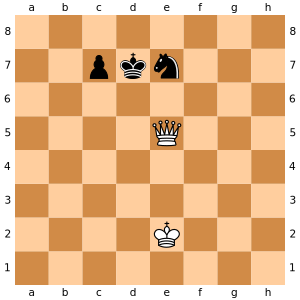

False
e7c8


In [21]:

eg = nnchess.EndGame("data/endgame/")
ex = "8/2pkn3/8/4Q3/8/8/4K3/8 b - - 0 1"
show_svg(chess.Board(ex))     
print chess.Board(ex).turn
print eg.getMove(chess.Board(ex))

In [23]:
from IPython.display import clear_output
b = chess.Board(ex)

20 a2g8
20 a2a8
20 a2f7
-1 a2a7
22 a2e6
22 a2a6
-1 a2d5
22 a2a5
-1 a2c4
20 a2a4
20 a2b3
20 a2a3
20 a2h2
20 a2g2
20 a2f2
20 a2e2
22 a2d2
20 a2c2
22 a2b2
22 a2a1
20 b1c2
20 b1b2
22 b1c1
22 b1a1
b1a1


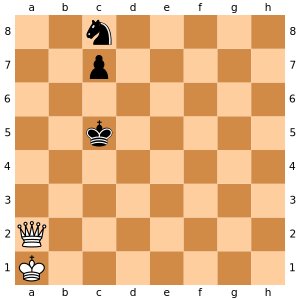

In [83]:
clear_output()
m = eg.getMove(b)
b.push(m)
show_svg(b)   

#### TreeTraversal with a search method

In [228]:
# t = "8/2pkn3/8/4Q3/8/8/4K3/8 w - - 0 1"
# len(t) - len(t.translate(None, 'p'))
# len(t) - len(t.translate(None, 'PNBQR'))

1

In [313]:
from IPython.display import clear_output

def _triveal(t, s):
        return len(t) - len(t.translate(None, s))
    
class TreeTraversal:
    def __init__(self, cache_size = 1000000):
        self.converter = FENConverter()
        self.posCache = LRU(cache_size)
#         engine = chess.uci.popen_engine("./stockfish")
#         engine.uci()
#         self.engine = engine
        self.nodeCnt = 0
        
    def evaluate(self, pos):
        f = pos.fen()
        
        if not f in self.posCache:
            # self.engine.position(pos)
            ## TODO: Substitute with NN
            # self.engine.go(movetime = 1)
            # bitrep = self.converter(f)
            
            # trivial eval
            f0 = f.split()[0]
            wt = _triveal(f0, 'P') + _triveal(f0, 'Q') * 9 + _triveal(f0, 'N') * 2.9 + \
                _triveal(f0, 'B') * 3 + _triveal(f0, 'R') * 5   
            bl = _triveal(f0, 'p') + _triveal(f0, 'q') * 9 + _triveal(f0, 'n') * 2.9 + \
                _triveal(f0, 'b') * 3 + _triveal(f0, 'r') * 5   

            self.posCache[f] = wt - bl #info_handler.info["score"][1].cp / 100.0
        
        return self.posCache[f]
    
    def search(self, pos, depth=2):
        ans = []
        turn = -1
        
        if pos.turn:
            turn = 1
        
        self.nodeCnt = 0
        bestScore = -turn * 100000
        bestMove = None
        
        for m in pos.legal_moves:
            pos.push(m)
            score = self._search(pos, depth, -turn)
            ans.append((score, m))
            pos.pop()
            
            if (turn == -1 and score < bestScore) or (turn == 1 and score > bestScore) :
                bestScore = score
                bestMove = m
                clear_output()
                show_svg(pos, arrows=[m])
            
            ## chose randomly between equal candidates
            if score == bestScore and np.random.rand() < 0.3:
                bestMove = m
                clear_output()
                show_svg(pos, arrows=[m]) 
        
        nodes = self.nodeCnt
        self.nodeCnt = 0
        
        # white should have bigger value first
        if pos.turn:
            return (bestMove, sorted(ans, key=lambda score: -score[0]), nodes)
        
        return (bestMove, sorted(ans, key=lambda score: score[0]), nodes)
            
    
    def _search(self, pos, depth, turn):
        self.nodeCnt += 1     
        
        if depth == 0: # return best evaluation
            return self.evaluate(pos)
        else:
            minmax = -turn * 100000
            
            # draw is 0
            if pos.is_stalemate:
                minmax = 0
            
            for m in pos.legal_moves:
                pos.push(m)
                res = self._search(pos, depth - 1, -turn)
                
                if (turn == -1 and res < minmax) or (turn == 1 and res > minmax):
                    minmax = res
                    
                pos.pop()
                
            return minmax
        

### Engine combined with early game and late game

In [314]:
class NNPlayer:
    def __init__(self, bookMax=-1):
        self.gameStage = 1 # 1 - opening, 2 - midgame, endgame
        self.earlyGame = EarlyGame()
        self.endGame = EndGame()
        self.midGame = TreeTraversal()
        self.moveNumber = 1
        self.bookMax = bookMax
        
    def makeMove(self, board):
        if self.gameStage == 1:
            m = self.earlyGame.getMove(board)

            if not m:
                self.gameStage = 2
                return self.makeMove(board)
            else:
                print self.moveNumber, ": Book"
            
            if self.bookMax == self.moveNumber:
                self.gameStage = 2
                
        elif self.gameStage == 2:
            m = self.endGame.getMove(board)
            
            if not m:
                print self.moveNumber, ": Midgame"
                sres = self.midGame.search(board)
                m = sres[0]
            else: 
                print self.moveNumber, ": Endgame"
        
        print m
        board.push(m)
            
        self.moveNumber += 1

### Two player game simulation

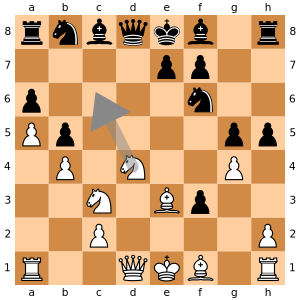

KeyboardInterrupt: 

In [315]:
p1 = NNPlayer()
p2 = NNPlayer(5)
brd = chess.Board()

while not brd.is_game_over():
    if brd.turn:
        p1.makeMove(brd)
    else:
        p2.makeMove(brd)
        
    clear_output()
    show_svg(brd)     